In [1]:
from metrics import cosine_similarity, euclidean_distance

In [2]:
import numpy as np

X = np.array([[6.6, 6.2, 1],
              [9.7, 9.9, 2],
              [8.0, 8.3, 2],
              [6.3, 5.4, 1],
              [1.3, 2.7, 0],
              [2.3, 3.1, 0],
              [6.6, 6.0, 1],
              [6.5, 6.4, 1],
              [6.3, 5.8, 1],
              [9.5, 9.9, 2],
              [8.9, 8.9, 2],
              [8.7, 9.5, 2],
              [2.5, 3.8, 0],
              [2.0, 3.1, 0],
              [1.3, 1.3, 0]])

In [3]:
import pandas as pd

df = pd.DataFrame(X, columns=['weight', 'length', 'label'])
df

,weight,length,label
0,6.6,6.2,1.0
1,9.7,9.9,2.0
2,8.0,8.3,2.0
3,6.3,5.4,1.0
4,1.3,2.7,0.0
5,2.3,3.1,0.0
6,6.6,6.0,1.0
7,6.5,6.4,1.0
8,6.3,5.8,1.0
9,9.5,9.9,2.0


<AxesSubplot:xlabel='weight', ylabel='length'>

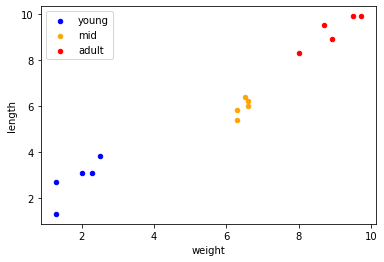

In [4]:
%matplotlib inline

ax = df[df['label'] == 0].plot.scatter(x='weight', y='length', c='blue', label='young')
ax = df[df['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid', ax=ax)
ax = df[df['label'] == 2].plot.scatter(x='weight', y='length', c='red', label='adult', ax=ax)
ax

<AxesSubplot:xlabel='weight', ylabel='length'>

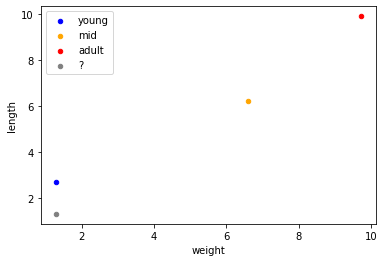

In [5]:
df2 = pd.DataFrame([df.iloc[0], df.iloc[1], df.iloc[4]], columns=['weight', 'length', 'label'])
df3 = pd.DataFrame([df.iloc[14]], columns=['weight', 'length', 'label'])

ax = df2[df2['label'] == 0].plot.scatter(x='weight', y='length', c='blue', label='young')
ax = df2[df2['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid', ax=ax)
ax = df2[df2['label'] == 2].plot.scatter(x='weight', y='length', c='red', label='adult', ax=ax)
ax = df3.plot.scatter(x='weight', y='length', c='gray', label='?', ax=ax)
ax

## Euclidean Distance

In [8]:
x0 = X[0][:-1]
x1 = X[1][:-1]
x4 = X[4][:-1]
x14 = X[14][:-1]
print(" x0:", x0, "\n x1:", x1, "\n x4:", x4, "\nx14:", x14)

 x0: [6.6 6.2] 
 x1: [9.7 9.9] 
 x4: [1.3 2.7] 
x14: [1.3 1.3]


In [9]:
print(" x14 and x0:", euclidean_distance(x14, x0), "\n",
      "x14 and x1:", euclidean_distance(x14, x1), "\n",
      "x14 and x4:", euclidean_distance(x14, x4))

 x14 and x0: 7.218032973047436 
 x14 and x1: 12.021647141718974 
 x14 and x4: 1.4000000000000001


## Cosine

In [10]:
print(" x14 and x0:", cosine_similarity(x14, x0), "\n",
      "x14 and x1:", cosine_similarity(x14, x1), "\n",
      "x14 and x4:", cosine_similarity(x14, x4))

 x14 and x0: 0.9995120760870786 
 x14 and x1: 0.9999479424242859 
 x14 and x4: 0.9438583563660174


## When to use Cosine Similarity
Cosine similarity is generally used as a metric for measuring distance when the magnitude of the vectors does not matter. This happens for example when working with text data represented by word counts. We could assume that when a word (e.g. science) occurs more frequent in document 1 than it does in document 2, that document 1 is more related to the topic of science. However, it could also be the case that we are working with documents of uneven lengths (Wikipedia articles for example). Then, science probably occurred more in document 1 just because it was way longer than document 2. Cosine similarity corrects for this.

Text data is the most typical example for when to use this metric. However, you might also want to apply cosine similarity for other cases where some properties of the instances make so that the weights might be larger without meaning anything different. Sensor values that were captured in various lengths (in time) between instances could be such an example.

## How do Euclidean Distance and Cosine Similarity Relate?
How do Euclidean Distance and Cosine Similarity Relate?

In [12]:
print("vectors \t", x0, x1, "\n"
      "euclidean \t", euclidean_distance(x0, x1), "\n"
      "cosine \t\t", cosine_similarity(x0, x1))

vectors 	 [6.6 6.2] [9.7 9.9] 
euclidean 	 4.827007354458868 
cosine 		 0.9991413385403556


Cosine similarity takes a unit length vector to calculate dot products. However, what happens if we do the same for the vectors we’re calculating the euclidian distance for (i.e. normalize them)? For this, we can for example use the L1 norm: